### Setting up the environment

In [1]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install requests
!pip install numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import Functions
print(dir(Functions))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'add_responses_to_excel', 'ast', 'calculate_metrics', 'check_graphql_response', 'compare_filters', 'extract_filters', 'fct_comparer_Filtre', 'graphQl', 'jaccard_similarity', 'jaccard_similarity_resultats', 'pd', 're', 'requests', 'valid_resultats']


### Visualisation Des Donnees 

In [3]:
# Charger le fichier Excel
input_file = 'output_llama.xlsx'
df = pd.read_excel(input_file)

In [4]:
df.head()

,question,Chatbot answer,Warning,Figures,Real_Query,Predict_Query,score
0,Where are the investments in Agriculture?,What status are you interested in? (in operati...,NaN,"Choropleth map (region, country) + Map deals l...",query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0
1,Where are the investments in Forestry?,What status are you interested in? (in operati...,NaN,"Choropleth map (region, country) + Map deals l...",query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0
2,Where are the investments in Mining?,What status are you interested in? (in operati...,NaN,"Choropleth map (region, country) + Map deals l...",query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0
3,What types of investment exist in Laos?,What status are you interested in? (in operati...,NaN,Histogram + Map deals location proportional ci...,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0
4,What types of investment exist in Tanzania?,What status are you interested in? (in operati...,NaN,Histogram + Map deals location proportional ci...,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0


In [5]:
df = df.drop(df.tail(7).index)
df= df.drop(columns=['Chatbot answer'])
df = df.drop(columns=['Warning'])
df = df.drop(columns=['Figures'])

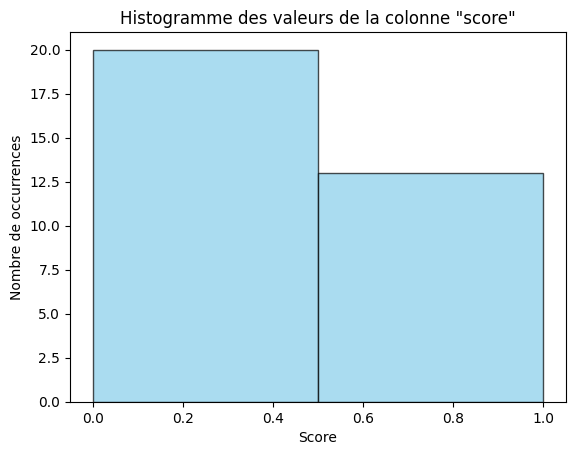

In [6]:
plt.hist(df['score'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des titres et des étiquettes
plt.title('Histogramme des valeurs de la colonne "score"')
plt.xlabel('Score')
plt.ylabel('Nombre de occurrences')

# Afficher l'histogramme
plt.show()

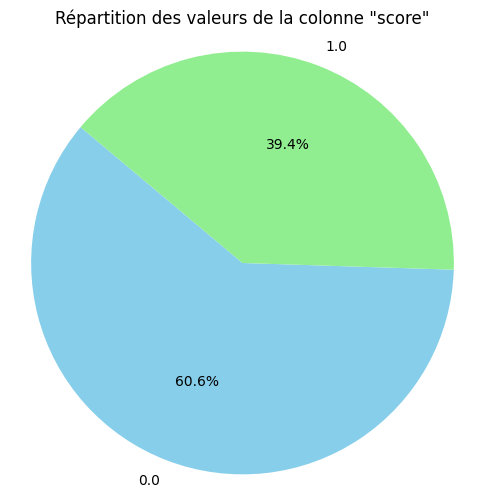

In [7]:
# Calculer les proportions de 0 et de 1
counts = df['score'].value_counts()

# Créer un diagramme circulaire
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Répartition des valeurs de la colonne "score"')
plt.axis('equal')  
plt.show()

In [8]:
counts

score
0.0    20
1.0    13
Name: count, dtype: int64

### Récupérer les réponses des requêtes GraphQL

In [9]:
# Appeler la fonction pour ajouter les réponses GraphQL au DataFrame
df_reponse = Functions.add_responses_to_excel(df)

# Enregistrer le DataFrame modifié dans un nouveau fichier Excel
output_file = r'output_reponse_v2.xlsx'
df_reponse.to_excel(output_file, index=False)

In [10]:
df_reponse.head()

,question,Real_Query,Predict_Query,score,Real_Response,Predict_Response
0,Where are the investments in Agriculture?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 8, 'country': {'id'...","{'data': {'deals': [{'id': 8, 'country': {'id'..."
1,Where are the investments in Forestry?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 12, 'country': {'id...","{'data': {'deals': [{'id': 1113, 'country': {'..."
2,Where are the investments in Mining?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 180, 'country': {'i...","{'data': {'deals': [{'id': 180, 'country': {'i..."
3,What types of investment exist in Laos?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 216, 'country': {'i...","{'data': {'deals': [{'id': 216, 'country': {'i..."
4,What types of investment exist in Tanzania?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 1834, 'country': {'...",{'data': {'deals': []}}


### Calcule de la similarité entre les réponses réelles et générées using Jaccard_Similarity

In [11]:
data = Functions.jaccard_similarity_resultats(df_reponse)
data = Functions.valid_resultats(data)
data.head()

,question,Real_Query,Predict_Query,score,Real_Response,Predict_Response,jaccard_score,valid_query
0,Where are the investments in Agriculture?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 8, 'country': {'id'...","{'data': {'deals': [{'id': 8, 'country': {'id'...",1.0,1
1,Where are the investments in Forestry?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 12, 'country': {'id...","{'data': {'deals': [{'id': 1113, 'country': {'...",0.136364,1
2,Where are the investments in Mining?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 180, 'country': {'i...","{'data': {'deals': [{'id': 180, 'country': {'i...",1.0,1
3,What types of investment exist in Laos?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 216, 'country': {'i...","{'data': {'deals': [{'id': 216, 'country': {'i...",1.0,1
4,What types of investment exist in Tanzania?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 1834, 'country': {'...",{'data': {'deals': []}},0.042553,0


### Evaluation des resultats

In [13]:
# Calculer la moyenne des scores

average_similarity_result = data['jaccard_score'].mean()
average_similarity_valid  = data['valid_query'].mean()

print("Coefficient de similarité moyen:", average_similarity_result)
print("Percentage of predictions which are valid graphQL (VA):", average_similarity_valid)

Coefficient de similarité moyen: 0.33094656263063665
Percentage of predictions which are valid graphQL (VA): 0.6363636363636364


### Calcule de similarite entre entites 

##### TP : Les déclarations sont trouvées à la fois dans les deux requêtes, indiquant que le modèle a correctement identifié les entités pertinentes.
##### FP : Le modèle a généré d'autres éléments en plus des entités nécessaires, indiquant une surproduction ou une inclusion d'informations non pertinentes.
##### FN : Le modèle n'a pas réussi à définir les entités pertinentes, indiquant qu'il a manqué des éléments essentiels dans sa réponse.

In [14]:
data_ET = Functions.fct_comparer_Filtre(df)

In [15]:
data_ET.head()

,question,Real_Query,Predict_Query,score,Real_Response,Predict_Response,TP,FP,FN,TP_value
0,Where are the investments in Agriculture?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 8, 'country': {'id'...","{'data': {'deals': [{'id': 8, 'country': {'id'...",1,0,0,0
1,Where are the investments in Forestry?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 12, 'country': {'id...","{'data': {'deals': [{'id': 1113, 'country': {'...",1,0,0,0
2,Where are the investments in Mining?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 180, 'country': {'i...","{'data': {'deals': [{'id': 180, 'country': {'i...",1,0,0,0
3,What types of investment exist in Laos?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,1.0,"{'data': {'deals': [{'id': 216, 'country': {'i...","{'data': {'deals': [{'id': 216, 'country': {'i...",1,0,0,1
4,What types of investment exist in Tanzania?,query Data {\n deals(\n filters: [\n ...,query Data {\n deals(\n filters: [\n ...,0.0,"{'data': {'deals': [{'id': 1834, 'country': {'...",{'data': {'deals': []}},1,0,0,0


### Metrics d'evaluation

In [16]:
Functions.calculate_metrics(data_ET)

Precision: 0.96
Recall: 0.75
Accuracy: 0.7272727272727273
F1 Score: 0.8421052631578947
TP:  24
FP:  1
FN:  8


In [17]:
# mean des valeurs bien definies
mean_value = data_ET["TP_value"].mean()
mean_value

0.3333333333333333